# Genre classification using Essentia descriptors

[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/enter-opy/genre-classification/blob/main/notebooks/essentia_discriptors.ipynb)

In [1]:
import pandas as pd
from scipy.io import arff
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns

## Data preprocessing

In [2]:
arff_train = arff.loadarff('../Data/GenreTrain.arff')
arff_test = arff.loadarff('../Data/GenreTest.arff')

In [3]:
df_train = pd.DataFrame(arff_train[0])
df_train.head()

,highlevel_danceability_value,highlevel_equalization_profile_value,highlevel_excitement_value,highlevel_intensity_value,highlevel_speech_music_value,highlevel_voice_instrumental_value,loudness_dynamic_complexity_dvar,loudness_dynamic_complexity_mean,loudness_dynamic_complexity_var,loudness_larm_dvar,...,tonal_chords_strength_dvar,tonal_chords_strength_mean,tonal_chords_strength_var,tonal_dissonance_dvar,tonal_dissonance_mean,tonal_dissonance_var,tonal_key_mode_value,tonal_key_strength_value,tonal_tuning_equal_tempered_deviation_value,genre
0,0.206472,0.372766,0.029087,0.093526,b'music',b'voice',-0.411385,0.024215,-0.201421,-0.532833,...,-0.255337,1.140774,-1.490395,0.494393,0.149725,-0.013634,b'minor',0.526779,-0.205793,b'blu'
1,-0.368479,0.372766,1.341977,0.093526,b'music',b'voice',-0.349921,-0.015672,-0.173045,-0.452769,...,-0.121114,0.497749,-0.901662,0.347729,-0.517640,0.184709,b'major',-0.129683,-0.667979,b'blu'
2,-0.631747,0.372766,-1.283803,-1.324366,b'speech',b'instrumental',4.235612,5.779127,3.973258,1.713613,...,-0.190639,1.408974,-0.502029,1.174496,-1.454160,2.144489,b'major',-1.022781,0.937795,b'blu'
3,-0.190116,0.372766,1.341977,0.093526,b'music',b'voice',-0.307576,0.068818,-0.216986,-0.519222,...,0.257633,0.622749,1.399033,0.791524,-0.601227,0.873673,b'major',0.074454,-0.406373,b'blu'
4,0.588278,0.372766,1.341977,0.802473,b'music',b'instrumental',-0.332032,-1.078238,0.350680,-0.765884,...,-0.309481,1.301291,-0.708195,-0.093155,0.287901,-0.644858,b'major',0.919307,-0.917709,b'blu'


In [4]:
df_test = pd.DataFrame(arff_test[0])
df_test.head()

,highlevel_danceability_value,highlevel_equalization_profile_value,highlevel_excitement_value,highlevel_intensity_value,highlevel_speech_music_value,highlevel_voice_instrumental_value,loudness_dynamic_complexity_dvar,loudness_dynamic_complexity_mean,loudness_dynamic_complexity_var,loudness_larm_dvar,...,tonal_chords_strength_dvar,tonal_chords_strength_mean,tonal_chords_strength_var,tonal_dissonance_dvar,tonal_dissonance_mean,tonal_dissonance_var,tonal_key_mode_value,tonal_key_strength_value,tonal_tuning_equal_tempered_deviation_value,genre
0,0.697263,-1.940715,0.029087,-1.324366,b'music',b'instrumental',-0.241667,-1.146509,0.325486,-0.191229,...,0.080969,-0.778015,0.863776,0.341611,0.055081,0.627751,b'major',-0.313933,0.435349,b'blu'
1,0.262506,0.372766,0.029087,1.511419,b'music',b'instrumental',0.022516,0.059654,-0.077408,-0.001814,...,0.280603,0.073804,0.560035,-0.618364,0.597166,-0.695840,b'major',0.449612,1.064124,b'blu'
2,2.287425,0.372766,1.341977,1.511419,b'music',b'instrumental',0.018952,-1.078183,0.299223,-0.764120,...,-0.073297,-1.347689,-0.498906,-0.705411,0.669616,-0.995246,b'major',-0.192094,-0.758522,b'blu'
3,0.043504,0.372766,0.029087,0.802473,b'music',b'instrumental',-0.099142,-1.303403,0.389536,-0.731556,...,0.044684,-0.822402,-0.035701,-0.121474,0.486625,-0.637245,b'major',-0.211747,0.040954,b'blu'
4,-1.160060,0.372766,-1.283803,-0.615420,b'music',b'voice',0.647357,0.200046,0.186096,0.776741,...,-0.392429,-0.322050,-0.019565,0.664354,-1.750386,1.117032,b'major',0.766112,-0.257589,b'blu'


In [5]:
df_train_encoded = df_train.copy()
categorical_cols = [col for col in df_train.columns if isinstance(df_train[col].iloc[0], bytes)]

label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df_train_encoded[col] = le.fit_transform(df_train_encoded[col])
    label_encoders[col] = le

In [6]:
df_test_encoded = df_test.copy()
categorical_cols = [col for col in df_test.columns if isinstance(df_test[col].iloc[0], bytes)]

label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df_test_encoded[col] = le.fit_transform(df_test_encoded[col])
    label_encoders[col] = le

In [7]:
X_train = df_train_encoded.drop(columns=['genre'])
y_train = df_train_encoded['genre']

In [8]:
y_train.tail()

795    9
796    9
797    9
798    9
799    9
Name: genre, dtype: int64

In [9]:
X_test = df_test_encoded.drop(columns=['genre'])
y_test = df_test_encoded['genre']

In [10]:
X_test.head()

,highlevel_danceability_value,highlevel_equalization_profile_value,highlevel_excitement_value,highlevel_intensity_value,highlevel_speech_music_value,highlevel_voice_instrumental_value,loudness_dynamic_complexity_dvar,loudness_dynamic_complexity_mean,loudness_dynamic_complexity_var,loudness_larm_dvar,...,tonal_chords_number_rate_value,tonal_chords_strength_dvar,tonal_chords_strength_mean,tonal_chords_strength_var,tonal_dissonance_dvar,tonal_dissonance_mean,tonal_dissonance_var,tonal_key_mode_value,tonal_key_strength_value,tonal_tuning_equal_tempered_deviation_value
0,0.697263,-1.940715,0.029087,-1.324366,0,0,-0.241667,-1.146509,0.325486,-0.191229,...,1.676670,0.080969,-0.778015,0.863776,0.341611,0.055081,0.627751,0,-0.313933,0.435349
1,0.262506,0.372766,0.029087,1.511419,0,0,0.022516,0.059654,-0.077408,-0.001814,...,-0.636402,0.280603,0.073804,0.560035,-0.618364,0.597166,-0.695840,0,0.449612,1.064124
2,2.287425,0.372766,1.341977,1.511419,0,0,0.018952,-1.078183,0.299223,-0.764120,...,-1.021915,-0.073297,-1.347689,-0.498906,-0.705411,0.669616,-0.995246,0,-0.192094,-0.758522
3,0.043504,0.372766,0.029087,0.802473,0,0,-0.099142,-1.303403,0.389536,-0.731556,...,0.134622,0.044684,-0.822402,-0.035701,-0.121474,0.486625,-0.637245,0,-0.211747,0.040954
4,-1.160060,0.372766,-1.283803,-0.615420,0,1,0.647357,0.200046,0.186096,0.776741,...,-0.636402,-0.392429,-0.322050,-0.019565,0.664354,-1.750386,1.117032,0,0.766112,-0.257589


In [11]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [12]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Logistic regression

In [13]:
accuracy = dict()

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [15]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [16]:
y_pred = lr.predict(X_test)

In [18]:
accuracy['Logistic regression'] = accuracy_score(y_test, y_pred) * 100
print(f"Test Accuracy: {accuracy['Logistic regression']:.2f}%")

Test Accuracy: 100.00%


## Support vector machine

In [19]:
from sklearn.svm import SVC

In [20]:
svm_clf = SVC()
svm_clf.fit(X_train, y_train)

SVC()

In [21]:
y_pred = svm_clf.predict(X_test)

In [22]:
accuracy['Support vector machine'] = accuracy_score(y_test, y_pred) * 100
print(f"Test Accuracy: {accuracy['Support vector machine']:.2f}%")

Test Accuracy: 93.26%


## Decision tree classifier

In [23]:
from sklearn.tree import DecisionTreeClassifier

In [24]:
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [25]:
y_pred = dt_clf.predict(X_test)

In [26]:
accuracy['Decision tree'] = accuracy_score(y_test, y_pred) * 100
print(f"Test Accuracy: {accuracy['Decision tree']:.2f}%")

Test Accuracy: 100.00%


## k-nearest neighbors

In [27]:
from sklearn.neighbors import KNeighborsClassifier

In [28]:
max_accuracy = 0.0

for k in range(25):
    curr_knn_clf = KNeighborsClassifier(n_neighbors=k+1, metric='euclidean')
    curr_knn_clf.fit(X_train, y_train)

    y_pred = curr_knn_clf.predict(X_test)
    
    curr_accuracy = accuracy_score(y_test, y_pred) * 100

    if curr_accuracy > max_accuracy:
        max_accuracy = curr_accuracy
        knn_clf = curr_knn_clf

In [29]:
y_pred = knn_clf.predict(X_test)

In [30]:
accuracy['k-nearest neighbors'] = accuracy_score(y_test, y_pred) * 100
print(f"Test Accuracy: {accuracy['k-nearest neighbors']:.2f}%")

Test Accuracy: 100.00%


## Artificial neural networks

In [31]:
from sklearn.neural_network import MLPClassifier

In [32]:
ann_clf = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000)
ann_clf.fit(X_train, y_train)

MLPClassifier(max_iter=1000)

In [33]:
y_pred = ann_clf.predict(X_test)

In [34]:
accuracy['Artificial neural network'] = accuracy_score(y_test, y_pred) * 100
print(f"Test Accuracy: {accuracy['Artificial neural network']:.2f}%")

Test Accuracy: 100.00%


## Random forest (Ensemble methods)

In [35]:
from sklearn.ensemble import RandomForestClassifier

In [36]:
rf_clf = RandomForestClassifier(n_estimators=100)
rf_clf.fit(X_train, y_train)

RandomForestClassifier()

In [37]:
y_pred = rf_clf.predict(X_test)

In [38]:
accuracy['Random forest'] = accuracy_score(y_test, y_pred) * 100
print(f"Test Accuracy: {accuracy['Random forest']:.2f}%")

Test Accuracy: 100.00%


## Result

In [39]:
df_accuracy = pd.DataFrame(list(accuracy.items()), columns=['Model', 'Accuracy'])
df_accuracy

,Model,Accuracy
0,Logistic regression,100.000000
1,Support vector machine,93.264249
2,Decision tree,100.000000
3,k-nearest neighbors,100.000000
4,Artificial neural network,100.000000
5,Random forest,100.000000


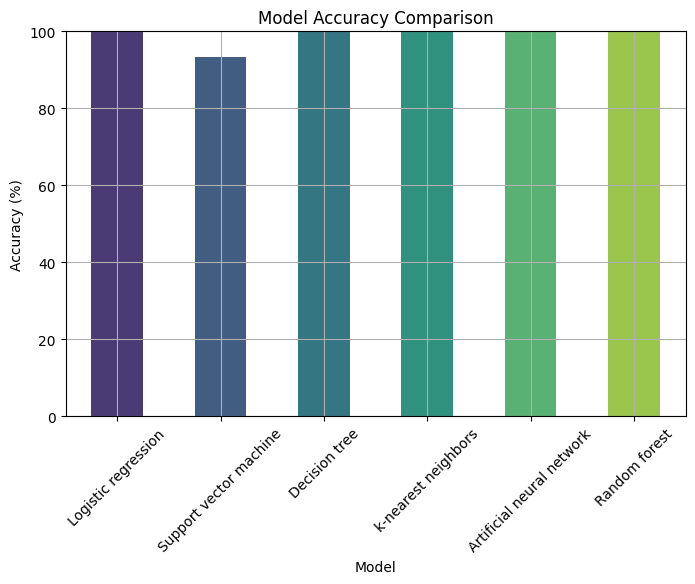

In [40]:
plt.figure(figsize=(8, 5))
sns.barplot(x='Model', y='Accuracy', data=df_accuracy, hue='Model', palette='viridis', width=0.5)
plt.title('Model Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.ylim(0, 100)
plt.xticks(rotation=45)
plt.grid()
plt.show()